In [1]:
!pip install pandas sklearn seaborn xgboost pandas_profiling

In [2]:
import pandas as pd                  
import numpy as np  
import seaborn as sns
import matplotlib 
from pandas_profiling import ProfileReport
import pathlib
import xgboost as xgb
from xgboost import plot_importance
from matplotlib import pyplot
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline


/opt/conda/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/train/merged_train.csv", sep=';' , decimal='.')
df.drop(['customerid'], axis=1, inplace=True)
df=df.astype(int)

In [4]:
# profile = ProfileReport(df, title='Pandas Profiling Report for ', explorative=True, vars={"num": {"low_categorical_threshold": 0}} )
# profile.to_file("profile.html")

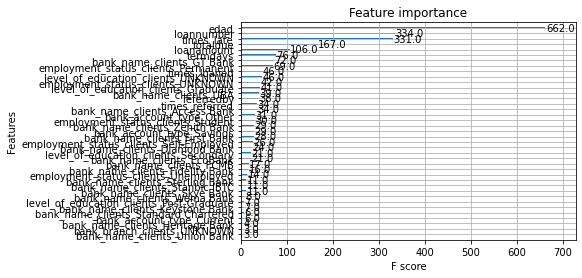

In [5]:
X, y = df.drop(["good_bad_flag"],axis=1), df['good_bad_flag']
model = xgb.XGBClassifier()
model.fit(X, y)
plot_importance(model)
plt.rcParams['figure.figsize'] = [100, 50]
plt.rc('legend', fontsize=16)
plt.show()

In [6]:
filtered_merged = pd.DataFrame(df, columns = ['good_bad_flag','edad', 'times_late', 'loannumber', 'totaldue', 'loanamount', 'bank_name_clients_GT Bank', 'times_loaned','employment_status_clients_Permanent', 'termdays','times_referred'])

In [7]:
filtered_merged

,good_bad_flag,edad,times_late,loannumber,totaldue,loanamount,bank_name_clients_GT Bank,times_loaned,employment_status_clients_Permanent,termdays,times_referred
0,1,48,0,2,13000,10000,1,1,0,30,1
1,0,36,1,2,13000,10000,0,1,1,30,0
2,1,35,2,4,13000,10000,0,3,0,30,0
3,1,30,1,2,11500,10000,1,1,1,15,0
4,1,31,2,6,24500,20000,0,5,1,30,0
...,...,...,...,...,...,...,...,...,...,...,...
3267,0,39,0,3,11500,10000,1,2,1,15,0
3268,1,36,1,3,11500,10000,1,2,0,15,0
3269,1,38,3,11,44000,40000,0,10,0,30,0
3270,1,36,3,7,24500,20000,0,6,1,30,0


In [8]:
filtered_merged.to_csv("top_10_train.csv",sep=';',encoding='utf8',index=False)

In [10]:
# Extraemos las variables también del dataset de test
df_test = pd.read_csv(r"https://raw.githubusercontent.com/medinaltbx/G6_DP3/master/data/input/merged_data/test/merged_test.csv", sep=';' , decimal='.')
df_test.drop(['customerid'], axis=1, inplace=True)
filtered_merged_test = pd.DataFrame(df, columns = ['edad', 'times_late', 'loannumber', 'totaldue', 'loanamount', 'bank_name_clients_GT Bank', 'times_loaned','employment_status_clients_Permanent', 'termdays','times_referred'])
filtered_merged_test.to_csv("top_10_test.csv",sep=';',encoding='utf8',index=False)